# Colors, Lines, Legends



Let's look at a dataset of wages over time.  I downloaded this data from the Bureau of Labor Statistics.  It covers weekly wages in US dollars, not adjusted for inflation.  I did a bit of easy wrangling and stored it in a csv.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [54]:
W = pd.read_csv('wages.csv')

In [55]:
W.head()

,year,less_than_high_school,high_school,some_college,college_degree,advanced_degree,all_workers
0,2000,365,503,590,825,997,573
1,2001,377,512,607,854,1047,589
2,2002,389,533,630,881,1060,611
3,2003,397,549,635,903,1104,620
4,2004,396,562,649,926,1149,634


In [56]:
W = W.set_index('year')

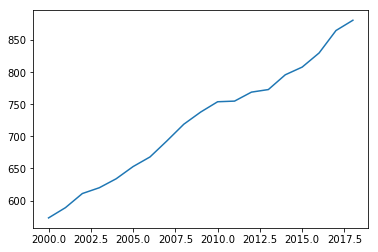

In [57]:
plt.plot(W.all_workers)

If you plot multiple lines on one `Axes`, you'll want to alter the colors with the `color` argument.  You can put in the name of a common color, or you can put in an arbitrary color in hex notation.

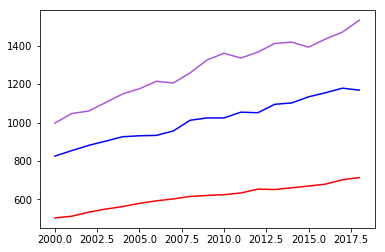

In [148]:
plt.plot(W.high_school, color = 'red')
plt.plot(W.college_degree, color = 'b')
plt.plot(W.advanced_degree, color = '#aa55dd')

To make a line dotted or dashed, use the `linestyle` argument.  This will improve accessibility for colorblind users.

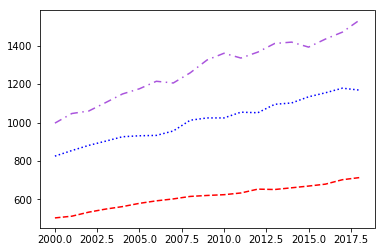

In [158]:
plt.plot(W.high_school, color = 'red', linestyle = '--')
plt.plot(W.college_degree, color = 'b', linestyle = ':')
plt.plot(W.advanced_degree, color = '#aa55dd', linestyle = (0,(5,3,1,3)))

Another way to improve accessibility is to use different markers for each datapoint.

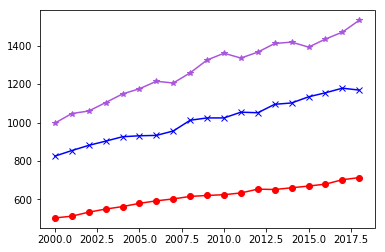

In [152]:
plt.plot(W.high_school, color = 'red', marker = "o")
plt.plot(W.college_degree, color = 'b', marker = "x")
plt.plot(W.advanced_degree, color = '#aa55dd', marker = "*")

There's a compact way of changing colors, linesstyle, and markers with one argument.  It will save you some typing, but it makes things less explicit.

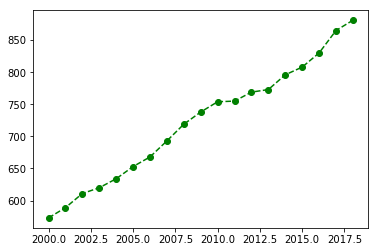

In [160]:
plt.plot(W.all_workers, 'go--')

### Adding a Legend

To add a legend, we can use `plt.legend()`.  Sometimes, the labels will match up perfectly without any trouble.  Other times, you have to tell Python what label goes with what element.  You do this by passing a `label` argument each time you add a feature to the plot.  The legend will look for these label attributes when plotting.

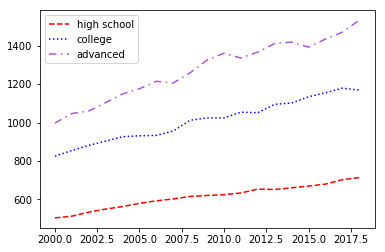

In [159]:
plt.plot(W.high_school, color = 'red', linestyle = '--', label = 'high school')
plt.plot(W.college_degree, color = 'b', linestyle = ':', label = 'college')
plt.plot(W.advanced_degree, color = '#aa55dd', linestyle = (0,(5,3,1,3)), label = 'advanced')
plt.legend()

### Choosing Colors

If you have just two or three lines to plot (and an artistic sensibility), you can just choose your colors manually.  If you have a lot of lines to plot, this starts to get difficult.  One strategy you can try in this case is to use a colormap.

In Python, a `colormap` is an object that takes values between 0 and 1 and maps them to different colors.  You can make your own, or there are a bunch of built-in ones that you can look at.  

See https://matplotlib.org/1.2.1/examples/pylab_examples/show_colormaps.html

We'll proceed with the `gnuplot` colormap.  Here's how you pull out a single color.

In [125]:
colormap = plt.cm.gnuplot
colormap(.5)

(0.70849190843207621, 0.12647636278656021, 0.0, 1.0)

The color you get out of a colormap is RGBA - red, green, blue, alpha.  The alpha refers to the opacity.

For our plot, we'll need several colors so we use an array of numbers between zero and one.

In [162]:
colormap = plt.cm.gnuplot
colors = [colormap(i) for i in np.linspace(0, 0.9, W.shape[1])]
colors

[(0.0, 0.0, 0.0, 1.0),
 (0.4247259785588175, 0.0058702007523501517, 0.9058734224033671, 1.0),
 (0.60065323917006408, 0.046961606018801214, 0.76736268144869713, 1.0),
 (0.73564697415828151, 0.15849542031345407, 0.0, 1.0),
 (0.84945195711763499, 0.37569284815040971, 0.0, 1.0),
 (0.94971615986763414, 0.73377509404376906, 0.0, 1.0)]

### Plotting an Entire DataFrame

We'd like to plot all variables in our `DataFrame` (except for `all_workers`).  One easy way to do this is to use the `plot` method that `DataFrame` has.  We'll pass in our colors using the `color` argument.

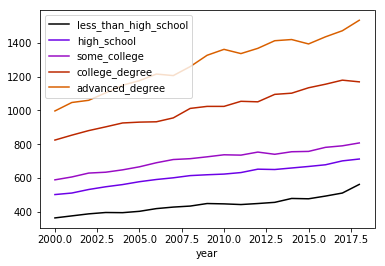

In [165]:
W2 = W.drop('all_workers', axis=1)
W2.plot(color = colors)

This method is fantastic when you're exploring, but you don't get very much flexibility in terms of colors, linestyles, etc.

To make a publication-quality plot, I normally use a `for` loop to add lines one at a time.

My usual strategy is to set up dictionaries for the colors, linestyles, and labels, and use these throughout an analysis to make sure that the colors match.

In [173]:
labeldict = {'less_than_high_school': 'less than high school', 
             'high_school': 'high school degree',
             'some_college': 'some college',
             'college_degree': 'college degree',
             'advanced_degree': 'advanced degree'
            }

linestyledict = {'less_than_high_school': (0,(1,1)), 
             'high_school': (0,(2,1)),
             'some_college': (0,(4,1)),
             'college_degree': (0,(6,1)),
             'advanced_degree': (0,(10,1))
            }

colordict = dict(zip(['less_than_high_school', 
             'high_school',
             'some_college',
             'college_degree',
             'advanced_degree'], colors))

Once you get all your dictonaries the way you want them, it's quite straightforward to build plots.

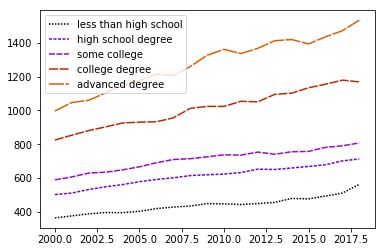

In [172]:
for var in W2.columns:
    plt.plot(W2[var], label = labeldict[var], color = colordict[var], 
             linestyle = linestyledict[var])
plt.legend()